알테어를 활용한 탐색적 데이터 시각화
===

(Explorative Data Visualization with Altair)
===

![altair](https://user-images.githubusercontent.com/10287629/138803189-907e3229-ba81-49c1-be97-0df36a01f013.png)

<div style="page-break-after: always;"></div>

# 2장. 데이터 유형, 마크 및 인코딩 채널

- 데이터 시각화는 _그래픽 마크_(graphical mark)의 집합체로 완성된다.  
  - 마크의 속성에는 위치(position), 모양(shape), 크기(size), 색상(color) 등이 포함된다.  
  - 이러한 마크는 _채널_(channel)을 통하여 특정 데이터 값에 인코드(encode)된다. 

- 다음과 같은 기본적 뼈대를 가지고, 다양한 데이터 시각화 결과를 완성할 수 있다.
  - _데이터 유형_
  - _마크_
  - _인코딩 채널_
- 이들에 대해서 살펴보고, 이들에 대한 사용 방법을 공부하자. 
- _이 노트북은 [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)의 일부이다._ 

In [1]:
import pandas as pd
import altair as alt

## 1. 세계 개발 데이터


- 세계 개발 데이터는 세계 각국의 건강과 인구에 관한 데이터이다.
  - `year`(연도): 1955년부터 2005년까지
  - `country`(국가): 63개 국가
  - `pop`(인구), `life_expect`(기대 수명), `fertility`(출산율)
  - 수집 주체: [Gapminder Foundation](https://www.gapminder.org/)
  - 강연: [Hans Rosling's popular TED talk](https://www.youtube.com/watch?v=hVimVzgtD6w)

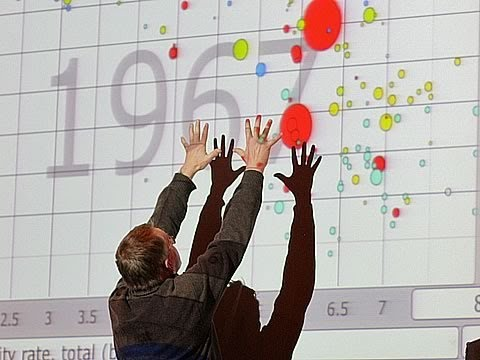

In [1]:
# import IPython.display.YouTubeVideo class.
from IPython.display import YouTubeVideo
# create an instance of YouTubeVideo class with provided youtube video id.
youtube_video = YouTubeVideo('hVimVzgtD6w')
# display youtube video
display(youtube_video)

- 세계 개발 데이터를 시각화하기 위하여,
  [vega-datasets](https://github.com/vega/vega-datasets) 컬렉션으로부터  
  판다스 데이터프레임으로 적재하자.  

In [2]:
from vega_datasets import data as vega_data
data = pd.read_json(vega_data.gapminder.url)

- 데이터 세트의 규모를 파악해 보자. 

In [3]:
data.shape

(693, 6)

- 693행 및 6 열! 데이터 내용을 들여다 보자: 

In [4]:
data.head(5)

,year,country,cluster,pop,life_expect,fertility
0,1955,Afghanistan,0,8891209,30.332,7.7
1,1960,Afghanistan,0,9829450,31.997,7.7
2,1965,Afghanistan,0,10997885,34.020,7.7
3,1970,Afghanistan,0,12430623,36.088,7.7
4,1975,Afghanistan,0,14132019,38.438,7.7


- 데이터에 관한 주요 통계량을 살펴보자. 

In [5]:
data.describe(include='all')

,year,country,cluster,pop,life_expect,fertility
count,693.000000,693,693.000000,6.930000e+02,693.000000,693.000000
unique,NaN,63,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,NaN,NaN,NaN,NaN
freq,NaN,11,NaN,NaN,NaN,NaN
mean,1980.000000,NaN,2.476190,5.623431e+07,66.146406,3.605755
std,15.822809,NaN,1.446971,1.553014e+08,10.714033,1.921234
min,1955.000000,NaN,0.000000,5.386500e+04,23.599000,0.940000
25%,1965.000000,NaN,1.000000,4.563732e+06,59.957000,2.015000
50%,1980.000000,NaN,3.000000,1.229200e+07,69.498000,2.930000
75%,1995.000000,NaN,3.000000,4.443444e+07,73.840000,5.000500


- 국가마다 5년 주기로 데이터가 저장되어 있다. 
  - 인구 규모는 최소 5.4만명에서 최대 13억명 수준이고, 중앙값은 1.2억명 수준이다. 
  - 기대수명은 최소 23.6세에서 최대 82.6세이고, 중앙값은 69.5세 수준이다. 
  - 출산율은 최소 0.9명에서 최대 8.5명이고, 중앙값은 2.9명 수준이다. 
- `cluster` 필드에는 정수 코드가 보이는데, 이것이 무엇인지는 나중에 알아보자. 

- 데이터프레임 규모를 줄이기 위하여, 2000년도 데이터만 추출하자: 

In [6]:
data2000 = data.loc[data['year'] == 2000]

In [7]:
data2000.head(5)

,year,country,cluster,pop,life_expect,fertility
9,2000,Afghanistan,0,23898198,42.129,7.4792
20,2000,Argentina,3,37497728,74.340,2.3500
31,2000,Aruba,3,69539,73.451,2.1240
42,2000,Australia,4,19164620,80.370,1.7560
53,2000,Austria,1,8113413,78.980,1.3820


## 2. 데이터 유형


- 효과적인 시각화를 위한 첫번째 요소는 입력 데이터이다.  
  - 데이터 값은 다양한 측정 형태를 표현한다.  
  - 이들 측정치에서 어떤 종류의 비교가 가능할까?  
  - 이러한 비교를 위해서는 어떤 종류의 시각적 인코딩이 필요할까?
- 알테어에서 (시각적 인코딩 선택 사항을 알리기 위해) 사용하는 기본적 *데이터 유형*부터 살펴보자. 
  - 데이터 유형에 근거하여 우리가 사용할 비교 유형이 결정된다. 
  - 이를 통하여 데이터 시각화 설계를 위한 의사결정이 가능하다. 

### 2.1 명목형

- *명목형*(nominal: N) 데이터는 범주(category) 이름으로 구성되고, *범주형* 데이터라고도 한다. 
- 명목형 데이터에서는 값이 동등한지 비교할 수 있다. 
  - 명목형 값 A와 명목형 값 B는 같은가, 아니면 다른가? (A = B) 아니면 (A != B).
- 위 데이터 세트에서 `country` 필드는 명목형이다.  
- 명목형 데이터를 시각화할 때, 값이 같은지 아니면 다른지를 판단할 수 있어야 한다. 
  - 위치, 색상(파랑, 빨강, 초록, *기타*), 모양 등의 채널을 활용할 수 있다. 
  - 크기 채널은 사용하기는 어렵다. 

### 2.2 서수형

- *서수형*(ordinal: O) 데이터는 특정 순서를 가진 값으로 구성된다. 

- 서수형 데이터를 사용하여 값의 순위 순서를 비교할 수 있다. 
  - 값 A가 값 B보다 앞에 오는가, 아나면 뒤에 오는가? (A < B) 아니면 (A >= B). 
  - A가 B보다 작은가, 아니면 A가 B보다 크거나 같은가?
- 위 데이터 세트에서 `year` 필드는 서수형이다. 
- 서수형 데이터를 시각화할 때, 값의 순위 순서를 판단할 수 있어야 한다. 
  - 위치, 크기, 색상 값의 밝기 등의 채널을 활용할 수 있다. 
  - (순서를 지정할 수 없는) 색상 채널은 사용하기 어렵다. 

### 2.3 정량형

- *정량형*(quantitative: Q) 데이터는 수치적 차이를 구분할 수 있는 값들로 구성된다. 
- 정량형 데이터를 구간(interval) 척도와 비율(ratio) 척도로 구분할 수 있다. 
  - 구간 척도에 해당하는 데이터에서는 두 값 사이의 거리를 측정할 수 있다. 
    - 값 A와 값 B 사이의 거리는 얼마인가? (A - B). 
    - 예를 들자면, A는 B에서 12 단위 떨어져 있다. 
  - 비율 척도에에서는 영점(zero-point)이 의미를 가지며,  
    비율이나 축척 인자를 측정할 수 있다.  
    - 값 A는 값 B의 몇 배인가?(A / B)
    - 예를 들자면, A는 B의 10%에 해당한다. B는 A의 10배이다. 

- 위 데이터 세트에서, `year` 필드는 정량형 구간 척도에 해당하는 필드이다. 
  - 구간 척도에서 영점은 의미가 없다. 연도, 온도 등은 구간 척도의 예이다. 
  - 연도에서는 서기, 단기, 불기, 공기, ... 등과 같이 영점에 절대적인 의미가 없으며,  
      서기 0년이라는 시점이 시간이 없다는 의미가 아니다. 
  - 온도에서는 섭씨, 화씨 등과 같이 영점에 절대적인 의미가 없으며, 
      섭씨 0도라는 점이 온도가 없다는 의미가 아니다. 
  - 구간 척도에서 영점은 편의상 기준점을 설정한 것일 뿐이다. 
- 위 데이터 세트에서, `fertility`(출산율) 및 `life_expect`(기대 수명)은 정량형 비율 척도에 해당하는 필드이다. 
  - 비율척도에서는 영점이 의미를 가진다.  
    무게, 길이, 넓이, 출산율, 기대 수명 등은 비율 척도의 예이다. 
  - 무게나 길이에서 영점은 무게나 길이가 없다는 의미이다. 
- 베가-라이트는 정량형 데이터를 표시할 수 있지만, 구간 척도와 비율 척도를 구별하지는 않는다. 
- 정량형 데이터를 사각화할 때, 
  - 위치, 크기, 색상 값 등의 채널을 활용할 수 있다. 
  - 비율 척도 값의 비례 관계를 비교할 때는, 축에서 *영점의 표시가 필수적*이다.
  - 구간 척도 값의 비교에서는 *영점 표시를 생략*할 수 있다.

### 2.4 시간형

- 시간형(temporal: T) 데이터는 시점이나 시간 구간을 측정하는 값들로 구성된다. 
  - 이는 정량형 데이터의 특별한 경우로서 타임스탬프(timestamp)로 부른다. 
  - 시간을 표현하는 다양한 표현 방식을 가진다.  
    예를 들어서 [그레고리 달력](https://ko.wikipedia.org/wiki/%EA%B7%B8%EB%A0%88%EA%B3%A0%EB%A6%AC%EB%A0%A5)을 참고하라. 
  - 베가-라이트에서 시간 유형은 (연, 월, 일, 시간 등의) 다양한 시간 단위에 대한 처리가 가능하며,  
    특정 시간 단위를 처리할 수 있다. 
- 시간에 관한 값의 예는 
  - `“2019-01-04T17:50:35.643Z”`와 같은 세계 표준 [ISO 날짜-시간 형식](https://ko.wikipedia.org/wiki/ISO_8601)과   
  - `“2019-01-04”`나 `“Jan 04 2019”`와 같은 날짜를 표시하는 문자열을 포괄한다. 
- 우리가 살펴보고 있는 세계 개발 데이터 세트에는 완전한 시간형 데이터가 포함되지 않았다.  
  - 대신에 `year` 필드에는 정수로 표현된 연도 값이 들어있다. 
  - 알테어에서 시간 데이터를 쓰는 자세한 방법에 관해서는 [Times and Dates documentation](https://altair-viz.github.io/user_guide/times_and_dates.html)를 참고하라. 
- 날짜/시간에 관한 국제 표준을 이해하려면 [UTC 와 표기법, 그리고 ISO 8601, RFC 3339 표준](https://ohgyun.com/416)를 참고하라.   

### 2.5 요약

- 이들 데이터 유형은 상호배타적이지 않으며, 오히려 계층적 구조라고 할 수 있다. 
  - 서수형 데이터에서도 (이름의 동등성에 관한) 명목형 비교가 가능하다. 
  - 정량형 데이터에서도 (순위 순서에 관한) 서수형 비교가 가능하다. 
- 더군다나 이들 데이터 유형이 고정된 범주로만 취급되지 않는다. 
  - 숫자로 표시된 데이터 필드라고 해서 반드시 정량형 유형으로만 처리해야 하는 것은 아니다. 
  - 예를 들어서, (10대, 20대, ...)와 같은 연령 집합을 가정하면, 이를 
    명목형으로 처리하여 이름만 구별할 수도 있고, 
    서수형으로 처리하여 순위를 인정할 수도 있고, 
    정량형으로 처리하여 평균값을 계산할 수도 있다. 
- 이러한 데이터를 어떻게 시각적으로 인코드할 수 있는지 살펴 보자. 

## 3. 인코딩 채널

- 알테어의 핵심에는 인코딩의 활용이 있는데,  
  이를 통해 데이터 유형에 따라서 구별된 데이터 필드를  
  선정된 *마크* 유형의 인코딩 *채널*에 연결시킬 수 있다. 
- 사용 가능한 채널을 모두 확인하려면, [Altair encoding documentation](https://altair-viz.github.io/user_guide/encoding.html)를 참고하라. 

- 중요한 인코딩 채널은 다음과 같다. 
    - `x`: 마크의 수평 축 또는 x-축
    - `y`: 마크의 수직 축 또는 y-축
    - `size`: 마크의 크기, 마크 유형에 따라서 마크의 면적이나 길이를 의미함
    - `color`: 마크의 색상, [legal CSS color](https://developer.mozilla.org/en-US/docs/Web/CSS/color_value)로 지정함
    - `opacity`: 마크의 투명도, 0(완전 투명)부터 1(완전 불투명)까지로 지정함
    - `shape`: `point` 마크를 위한 기호의 모양
    - `tooltip`: 마크 위로 마우스를 올릴(hover) 때 출력할 툴팁 텍스트
    - `order`: 마크 표시 순서
    - `column`: 데이터를 수평 정렬하는 하위 플롯으로 배치하는 열
    - `row`: 데이터를 수직 정렬하는 하위 플롯으로 배치하는 행

### 3.1 X

- `x` 인코딩 채널로 마크의 수평 위치, x 좌표를 설정한다. 
  - 축의 제목은 자동적으로 지정된다. 
  - 아래 차트에서 데이터 유형을 `Q`로 지정하였으므로, 연속적인 선형 축 스케일로 자동 처리되었다. 

In [8]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q')
)

alt.Chart(...)

### 3.2 Y

- `y` 인코딩 채널로 마크의 수직 위치, y 좌표를 설정한다. 
  - `cluster` 필드를 서수형(`O`)으로 지정하였으므로, 이산형 축으로 처리되었다.  
  - 이산형 축에서 값 간의 간격은 기본값으로 처리된다.  

In [9]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:O')
)

alt.Chart(...)

- 직전 차트에서 서수형으로 지정되었던 y 축을 정량형으로 변경하면 어떻게 될까?
  - y 축을 기대 수명 `life_expect` 필드로, 데이터 유형은 `Q`로 지정하자. 
  - 결과는 두 축 모두 선형 스케일을 가지는 산점도(scatter plot)로 시각화된다. 
  - 출산율과 기대 수명 사이에 강력한 상관관계가 확인된다. 

In [10]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q')
)

alt.Chart(...)

- 기본적으로, 선형 정량형 스케일로 지정된 축에는 원점이 포함되는데,   
  이는 비율 척도 데이터의 비교를 위한 기준선을 제공하기 위한 것이다. 
- 그렇지만 어떤 경우에는 원점 기준선이 의미가 없거나  
  비교를 위하여 특정 구간에만 초점을 맞추고 싶을 수 있다. 
- 원점 기준선이 자동적으로 포함되는 것을 방지하려면,  
  인코딩 `scale` 매개변수를 사용해서 스케일 맵핑을 설정해야 한다. 

In [11]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False)),   # 스케일 맵핑 설정 
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False))  # 스케일 맵핑 설정
)

alt.Chart(...)

- 이렇게 하면, 축 스케일에 원점이 포함되지 않는다.  
  - 그래도 일부 내부 여백(padding)이 여전히 포함되는데,  
    5 또는 10 등의 배수 수치로 눈금선을 멋지게(nice) 처리하기 위한 것이다.  
  - `nice=False` 인자를 추가로 지정할 수 있다. 

In [12]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q', scale=alt.Scale(zero=False, nice=False)),   # 스케일 맵핑 설정 
    alt.Y('life_expect:Q', scale=alt.Scale(zero=False, nice=False))  # 스케일 맵핑 설정
)

alt.Chart(...)

### 3.3 크기

- `size` 인코딩 채널은 마크의 크기를 설정한다. 
  - 채널의 의미는 마크 유형에 따라 달라진다. 
  - `point` 마크라면, `size` 채널은 플롯팅 심볼의 픽셀 영역을 의미한다. 
  - 점의 지름은 `size` 값의 제곱근으로 설정된다. 
- 앞서 작성했던 산점도에 대하여 인구 규모 `pop` 필드를 `size` 채널로 인코딩해 보자.  
  차트에는 크기에 대한 범례가 추가된다. 

In [13]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q')
)

alt.Chart(...)

- 어떤 상황에서는 기본적으로 지정되는 크기가 마음에 들지 않을 수 있다. 
  - 크기를 맞춤형으로 지정하려면,  
    `scale` 속성에 대하여 `range` 매개변수를  
    크기에 대한 최소값과 최대값의 배열로 지정할 수 있다. 
  - 아래에서는 점의 크기를 최소값은 0 픽셀로, 최대값은 1,000 픽셀로 지정하였다. 

In [14]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0, 1000]))
)

alt.Chart(...)

### 3.4 색상과 투명도

- `color` 인코딩 채널은 마크 색상을 설정한다.  
  색상 인코딩의 스타일은 데이터 유형에 의존적이다.  
  - 명목형 데이터에 대한 색상은 다채로운 색상의 질적 색채도로 처리된다. 
  - 서수형 및 정량형 데이터에 대한 색상은 지각 가능도록 순서화된 색상 그래디언트(gradient)로 처리된다. 
- 여기서는 `color` 채널을 명목형(`N`) 데이터 유형의 `cluster` 필드로 지정하였다. 
  - 클러스터에 대한 범례가 추가되었다. 
  - 클러스터 필드의 의미를 짐작할 수 있는가?

In [15]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

alt.Chart(...)

- 원의 내부가 색상으로 채워지기를 바란다면,  
  `mark_point()` 메소드에서 `filled=True`  속성을 지정하면 된다. 

In [16]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N')
)

alt.Chart(...)

- 기본적으로, 알테어는 과도한 겹침 현상을 완화하기 위하여 투명도를 활용한다. 
  투명도를 맞춤형으로 조절하려면,  
  - `mark_*` 메소드에 대하여 기본값을 지정하거나, 
  - 인코딩 메소드에서 `OpacityValue` 값을 설정해야 한다. 
- 아래에서는 인코드 메소드에서 `OpacityValue` 값을 데이터 필드가 아닌 상수로 지정하였다. 

In [17]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5)
)

alt.Chart(...)

### 3.5 모양

- `shape` 인코딩 채널은 `point` 마크에 대한 기하학적 모양을 설정한다.  
  - 이제껏 공부한 다른 채널과 달리, `shape` 채널은 다른 마크 유형에 대해서는 사용할 수 없다. 
  - 모양 인코딩 채널은 명목형 데이터에 대해서만 사용 가능하며,  
    서수형 및 정량형 비교에 대해서는 적용이 불가능하다. 
- `cluster` 필드를 `shape` 및 `color` 채널에 지정해 보자. 
  - 단일 필드에 대하여 복수 채널을 지정하는 방식을 *다중 인코딩*(redundant encoding)이라고 한다. 
  - 시각화 결과에는 색상과 모양이 결합된 단일 심볼이 범례에 추가된다.  

In [18]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 3.6 툴팁 및 순서

- 아직까지 시각화된 점이 어느 나라인지를 짐작하기는 쉽지 않다.  
  상호작용 방식으로 볼 수 있는 툴팁으로 나라 이름을 확인할 수 있도록 해보자. 
- `tooltip` 인코딩 채널은 사옹자가 마우스 커서를 특정 마크에 올릴 때 보여줄 툴팁 텍스트를 지정한다.  
  `country` 필드에 대한 툴팁 인코딩을 추가하자. 

In [19]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country')
)

alt.Chart(...)

- 마우스로 탐사해보면, 특정 점에 대한 툴팁을 확인할 수 없는 경우가 있다.  
  - 예를 들어서 다크 블루 색상에서 제일 큰 원이 인도이다.  
  - 이 원이 인구가 더 작은 어느 나라의 원을 가리고 있고,  
    해당 국가의 정보를 확인할 수가 없다. 
  - `order` 인코딩 채널로 이 문제를 해결할 수 있다. 
  - `order` 인코딩 채널은 데이터 점의 화면 표시 순서를 결정한다.  
    이 채널은  `line` 및 `area` 마크의 표시 순서를 동시에 결정한다.
- 차트에서 원이 표시되는 순서를 인구 `pop` 열의 내림차순으로 설정해서,  
  작은 원이 큰 원보다 나중에 그려지도록 조정하자. 

In [20]:
chart = alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending')
)

- 이제 작은 원으로 표시된 국가 이름을 확인할 수 있다.  
  인도 앞의 작은 원으로 표시된 국가는 방글라데시이다. 
- 이제 나라 이름을 확인해보면, `cluster`에 의하여 구분된 색상의 의미를 짐작할 수 있다. 

In [21]:
chart 

alt.Chart(...)

- 현재 툴팁은 데이터 레코드에 대한 단 한 가지 속성만을 표시하고 있다.  
- 여러 값을 동시에 보여주려면, `tooltip` 채널에 대하여 배열로 원하는 여러 필드를 지정할 수 있다. 

In [22]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Order('pop:Q', sort='descending'),
    tooltip = [
        alt.Tooltip('country:N'),
        alt.Tooltip('fertility:Q'),
        alt.Tooltip('life_expect:Q')
    ]   
)

alt.Chart(...)

- 이제 마우스를 데이터 포인트에 올려서 여러 데이터 필드의 내용을 확인할 수 있다. 

### 3.7 열/행 다면 구성

- 공간적 위치야말로 시각적 인코딩을 위한 가장 강력하고도 유연한 채널이다.  
  - 그런데 이미 `x` 및 `y` 채널에 데이터 필드를 할당한 상태라면,  
    데이터의 부분 집합마다 하위 플롯을 별도로 시각화하는 *격자 플롯*(trellis plot)을 생성할 수 있다.  
  - 격자 플롯은 뷰를 작은 여러 개로([small multiples](https://en.wikipedia.org/wiki/Small_multiple)) 구성하는 기법의 한 사례이다.
- `column` 및 `row` 인코딩 채널은 수평적이거나 수직적인 하위 플롯의 집합을 생성하도록 설정해 준다.  
  - 지정한 데이터 필드 값에 근거하여 데이터를 분할하여 하위 플롯을 다수 생성한다.  
  - 여기서는 `cluster` 값마다 열을 구분하여 하위 플롯을 격자 플롯 형태로 만들어 보자. 

In [23]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000])),
    alt.Color('cluster:N'),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
)

alt.Chart(...)

- 직전 플롯은 너무 작아서 알아보기 어렵다. 
  - 차트의 `width` 및 `height` 속성을 `properties()` 메소드에서 설정할 수 있다.
  - 열 헤더에 `cluster` 값이 표시되기 때문에 이에 대한 범례를 제거하기 위해서  
    `Color` 인코딩 채널에서 `legend=None`으로 지정한다. 
  - 또한 `Size` 인코딩 채널에서 `legend` 속성에 대하여  
    `orient='bottom'` 및 `titleOrient='left'`로 지정한다.  

In [24]:
alt.Chart(data2000).mark_point(filled=True).encode(
    alt.X('fertility:Q'),
    alt.Y('life_expect:Q'),
    alt.Size('pop:Q', scale=alt.Scale(range=[0,1000]),
             legend=alt.Legend(orient='bottom', titleOrient='left')),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending'),
    alt.Column('cluster:N')
).properties(width=135, height=135)

alt.Chart(...)

- `column` 및 `row` 인코딩을 지정하면, 배후에서 이들이 `facet` 뷰 구성을 사용하는 새로운 명세로 변환된다.  
  `facet`에 대해서는 나중에 더 자세히 공부할 기회를 가지겠다. 


### 3.8 상호작용적 필터링

- 데이터 탐색을 위한 상호작용성에 대해서는 나중에 더 자세히 공부할 예정이다.  
  - `year` 필드에 범위 슬라이더를 연결하여 각 연도에 대한 상호작용적 문질러 닦기(scrubbing)를 구현할 수 있다. 
  - 아래 코드가 다소 복잡해 보이겠지만, 나중에 상호작용성을 자세히 공부할 예정이므로 너무 걱정할 필요는 없다. 
- 연도 슬라이더를 앞뒤로 드래그하여 시간에 따라서 변화하는 데이터 값을 감상하라!

In [25]:
select_year = alt.selection_single(
    name='select', fields=['year'], init={'year': 1955},
    bind=alt.binding_range(min=1955, max=2005, step=5)
)

alt.Chart(data).mark_point(filled=True).encode(
    alt.X('fertility:Q', scale=alt.Scale(domain=[0,9])),
    alt.Y('life_expect:Q', scale=alt.Scale(domain=[0,90])),
    alt.Size('pop:Q', scale=alt.Scale(domain=[0, 1200000000], range=[0,1000])),
    alt.Color('cluster:N', legend=None),
    alt.OpacityValue(0.5),
    alt.Tooltip('country:N'),
    alt.Order('pop:Q', sort='descending')
).add_selection(select_year).transform_filter(select_year)

alt.Chart(...)

## 4. 그래픽 마크

- 지금까지 인코딩 채널에 대해 공부하면서 `point` 마크에만 집중했었다. 
  이 외에도 다양한 기하학적 모양의 마크를 사용할 수 있다. 
    - `mark_area()` - 상단 선과 기저 선으로 정의되는 채워진 영역
    - `mark_bar()` -	사각형 막대
    - `mark_circle()`	- 채워진 원으로 표시되는 산점도
    - `mark_line()` - 연결된 꺽어진 선
    - `mark_point()` - 모양을 설정할 수 있는 산점도
    - `mark_rect()` - 열지도(heatmap)등에 사용되는 채워진 사각형
    - `mark_rule()` - 축을 가로지르는 수직선 또는 수평선
    - `mark_square()` - 사각형 점으로 표시되는 산점도
    - `mark_text()` - 텍스트로 표신하는 산점도
    - `mark_tick()` - 수직 또는 수평 눈금	
- 그래픽 마크에 대한 전체 목록과 예제를 확인하려면 [Altair marks documentation](https://altair-viz.github.io/user_guide/marks.html)를 보라. 
- 아래에서 통계적 시각화에서 자주 사용하는 마크 유형을 공부하자.

### 4.1 점 마크

- `point` 마크 유형은 *산점도 scatter plots* 및 *점 플롯 dot plots*과 같이 점을 시각화 한다. 
  - 점 마크에서는 기본적으로 2차원 위치를 표시하기 위하여 `x`와 `y` 인코딩 채널을 지정한다. 
  - 아울러 색상 `color`, 크기 `size` 및 모양 `shape` 인코딩 채널에 대하여 추가적인 데이터 필드를 지정할 수 있다.
- 아래는 출산율 `fertility`을 x-축 인코딩 채널로,  
  지역을 의미하는 `cluster` 필드를 y-축 및 모양 `shape` 인코딩 채널로 지정한 점 플롯(dot plot)이다.    

In [26]:
alt.Chart(data2000).mark_point().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

- 인코딩 채널 외에도, 
  `mark_*()` 메소드에서 여러 옵션 값을 지정하여 마크 스타일을 지정할 수 있다. 
  점 마크는 기본적으로 외곽선으로 그려지는데,  
  - `filled` 옵션으로 색상이 채워진 모습으로 도형을 표시하거나, 
  - `size` 옵션으로 도형의 크기를 지정할 수 있다. 

In [27]:
alt.Chart(data2000).mark_point(filled=True, size=200).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 4.2 원 마크

- `circle` 마크 유형은 내부가 채워진 원 형태로 시각화하기 위하여 `point` 마크 대신에 사용된다. 

In [28]:
alt.Chart(data2000).mark_circle(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 4.3 정사각형 마크

- `square` 마크 유형은 내부가 채워진 정사각형 형태로 시각화하기 위하여 `point` 마크 대신에 사용된다. 

In [29]:
alt.Chart(data2000).mark_square(size=100).encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 4.4 눈금 마크

- `tick` 마크 유형은 데이터 포인트를 짧은 선분 형태의 눈금(tick)으로 시각화한다. 
  - 이러한 시각화는 일차원 직선 상에서 겹치는 부분을 최소화 한 형태로 값을 비교할 때 유용하다. 
  - 눈금 마크로 그려진 점 플롯을 때로 *스트립 플롯 strip plot*으로 부르기도 한다. 

In [30]:
alt.Chart(data2000).mark_tick().encode(
    alt.X('fertility:Q'),
    alt.Y('cluster:N'),
    alt.Shape('cluster:N')
)

alt.Chart(...)

### 4.5 막대 마크

- `bar` 마크 유형은 직사각형의 긴 막대 모양으로 시각화한다. 
- 아래에서는 국가별 인구 `pop` 필드에 대한 단순한 막대 차트를 시각화 한다. 

In [31]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('country:N'),
    alt.Y('pop:Q')
)

alt.Chart(...)

- 수직 막대 차트를 수평 막대 차트로 변경하려면,  
  x-축과 y-축에 대한 인코딩 필드를 맞바꾸어 준다. 

In [32]:
alt.Chart(data2000).mark_bar().encode(
    alt.Y('country:N'),
    alt.X('pop:Q')
)

alt.Chart(...)

- 막대 폭은 기본값으로 자동 설정된다.  
  이를 변경하려면, `x` 채널에 대한 `scale` 속성의 `rangeStep` 옵션을 설정한다.   
  축, 스케일 및 범례에 대한 설정에 대해서는 나중에 자세히 공부할 예정이다. 
- 막대를 적층식으로 쌓아서 시각화 할 수 있다.  
  `x` 인코딩을 지역 `cluster` 필드로 수정하고, 국가 `country` 필드를 `color` 채널로 인코딩하여 보자.  
  또한 국가에 대한 범례는 생략하도록 지정하고, 국가 이름을 툴팁으로 처리하자. 

In [33]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('cluster:N'),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
)

alt.Chart(...)

- 위 차트에서, `color` 인코딩 채널이 알테어/베가-라이트로 하여금 막대 마크를 자동으로 쌓아 올리도록 만들어 준다. 
- 만일 적층식이 싫다면, 아래와 같이
  - `y` 인코딩 채널에 대해서 `stack=None` 옵션을 추가 지정하라.  
    이렇게 하면, 모든 국가별 막대가 같은 위치에 그려질 것이다. 
  - 이때 `order` 인코딩 채널에서 인구의 오름차순으로 순서를 지정해야 한다. 

In [34]:
alt.Chart(data2000).mark_bar().encode(
    alt.Order('pop:Q', sort='ascending'),  # 주석 제거
    alt.X('cluster:N'),
    alt.Y('pop:Q', stack=None),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N'), 
)

alt.Chart(...)

- 이전 막대 차트는 영점 기저 선(zero-baseline)을 기준으로 시각화 되었다. 
  - `y` 채널은 영 아닌(non-zero) 값만을 막대로 인코드 한다.
  - 원한다면, 막대 마크에서 막대의 시작 및 끝 점을 범위로 지정할 수 있다. 
- 아래 차트는 `x` (시작 점) 및 `x2` (종료 점) 채널을 사용하여 지역별 기대 수명을 보여준다.   
  - 여기서는 `min()` 및 `max()` 집계 함수를 사용하여 기대 수명 범위의 시작 값과 끝 값을 처리하였다. 
  - 집계 함수에 대해서는 나중에 자세히 공부할 예정이다. 
- 또 다른 방법으로, `x` 및 `width`를 활용하여  
  `x2 = x + width`와 같이 시작 점과 오프셋을 지정할 수 있다.

In [35]:
alt.Chart(data2000).mark_bar().encode(
    alt.X('min(life_expect):Q'),
    alt.X2('max(life_expect):Q'),
    alt.Y('cluster:N')
)

alt.Chart(...)

### 4.6 선 마크

- `line` 마크 유형은 그려진 점들을 선분으로 연결한다.  
  선의 기울기로 변화율 정보를 보여줄 수 있다. 
- 국가별 출산율을 연도에 따라서 꺽은선 차트로 시각화하자.  
  - 필터링되지 않은 세계 개발 데이터프레임 전체를 사용하자. 
  - 범례는 숨기고 툴팁을 활용하자. 

In [36]:
alt.Chart(data).mark_line().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=600
)

alt.Chart(...)

- 국가마다 보여주는 변화가 흥미롭다. 
  - 하지만 전반적인 추세는 시간이 갈수록 출산율이 낮아진다는 점이다. 
  - 차트 폭을 변경하였는데, 이 부분을 제거하면 어떻게 되는지 확인해 보라. 
- 맞춤형 시각화를 위하여 마크 매개변수에 대한 기본값을 변경해 보자. 
  - `strokeWidth`를 설정하여 선의 굵기를 조절할 수 있다. 
  - `opacity`를 설정하여 투명도를 조절할 수 있다. 
  - `line` 마크는 기본적으로 꺽은선을 사용하는데, 부드러운 곡선으 사용하도록 조절할 수 있다.  
    - `interpolate` 마크 매개변수를 설정하여 보간법을 적용할 수 있다. 
    - `'monotone'` 보간법을 적용해 보자. 

In [37]:
alt.Chart(data).mark_line(
    strokeWidth=3,                        # 선 굵기
    opacity=0.5,                          # 투명도
    interpolate='monotone'                # 보간법
).encode(
    alt.X('year:O'),
    alt.Y('fertility:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width=600
)

alt.Chart(...)

- `line` 마크를 사용하여 *기울기 그래프 slope graphs*를 시각화 할 수 있다.  
  이를 통해 두 비교 점 간의 변화를 기울기로 보여주는 시각화가 가능하다. 
- 모든 국가의 인구 변화를 기울기로 보여주는 기울기 그래프를 시각화 해 보자. 
  - 먼저 판다스 데이터프레임에서 1955년과 2005년에 해당하는 데이터 만을 추출하자. 
  - 기본값으로 그리면, 두 연도에 해당하는 x-축 눈금이 너무 근접하게 되므로,  
    폭과 관련한 속성을 `width={"step": 100}`으로 조정하자. 

In [38]:
dataTime = data.loc[(data['year'] == 1955) | (data['year'] == 2005)]

alt.Chart(dataTime).mark_line(opacity=0.5).encode(
    alt.X('year:O'),
    alt.Y('pop:Q'),
    alt.Color('country:N', legend=None),
    alt.Tooltip('country:N')
).properties(
    width={"step": 100} # adjust the step parameter
)

alt.Chart(...)

### 4.7 면적 마크

- `area` 마크 유형은 꺽은선 `line` 마크와 막대 `bar` 마크를 결합한 형태이다.  
  데이터 포인트 간의 기울기와 채워진 영역을 함께 보여준다. 
- 아래 차트는 우리 나라에 대해서, 연도에 따른 출산율의 변화를 면적 차트로 보여준다. 

In [39]:
dataUS = data.loc[data['country'] == 'South Korea']

alt.Chart(dataUS).mark_area().encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
).properties(
    width={"step": 50}
)

alt.Chart(...)

- `line` 마크와 마찬가지로 `area` 마크도 `interpolate` 매개변수를 지원한다.

In [40]:
alt.Chart(dataUS).mark_area(interpolate='monotone').encode(
    alt.X('year:O'),
    alt.Y('fertility:Q')
).properties(
    width={"step": 50}
)

alt.Chart(...)

- `bar` 마크와 유사하게, `area` 마크도 쌓기(stacking)를 지원한다.  
  - 북미 3국에 대한 데이터프레임을 새롭게 생성한다. 
  - `area` 마크와 `color` 인코딩 채널을 이용하여 나라별로 쌓아 올린 시각화를 완성해 보자. 

In [41]:
dataNA = data.loc[
    (data['country'] == 'United States') |
    (data['country'] == 'Canada') |
    (data['country'] == 'Mexico')
]

alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q'),
    alt.Color('country:N')
).properties(
    width={"step": 50}
)

alt.Chart(...)

- 기본적으로, 쌓아올리기는 영점 기저선(zeo baseline)에 대한 상대값으로 처리되는데,  
  다른 `stack` 옵션을 지정할 수 있다. 
  * `center` - 차트의 중앙을 기저선으로 지정하여, *스트림 그래프 streamgraph*로 시각화 할 수 있다. 
  * `normalize` - 데이터의 합계 값을 정규화하여 전체가 100%가 되면서, 각 요소의 비중을 백분율로 시각화 할 수 있다. 
- 아래에서는 `y` 인코딩에 `stack` 속성을 `center`로 지정하여 시각화 해 보자. 

In [42]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack='center'),
    alt.Color('country:N')
).properties(
    width={"step": 50}
)

alt.Chart(...)

- 이번에는 y 인코딩에 `stack` 속성을 `normalize`로 지정하여 시각화 해 보자.

In [43]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack='normalize'),
    alt.Color('country:N')
).properties(
    width={"step": 50}
)

alt.Chart(...)

- 쌓아올리기를 모두 취소하려면, `stack` 속성을 `None`으로 설정하라.  
  - 이렇게 되면 모든 면적 요소가 영점 기저선에서부터 그려진다. 
  - 또한 `opacity`를 `area` 마크에 대한 기본 매개변수로 지정하여, 겹쳐진 영역을 확인할 수 있다. 

In [44]:
alt.Chart(dataNA).mark_area(opacity=0.5).encode(
    alt.X('year:O'),
    alt.Y('pop:Q', stack=None),
    alt.Color('country:N')
).properties(
    width={"step": 50}
)

alt.Chart(...)

- `area` 마크 유형도 데이터 중심의 기저선을 지원한다.  
  - 데이터 필드에 의하여 계산한 상한 및 하한 시리즈를 적용할 수 있다.  
  - `bar` 마크에서 처럼, `x` 및 `x2` (또는 `y` 및 `y2`) 채널을 통하여 `area` 마크의 종료 점을 표시할 수 있다. 
- 아래 차트는 북미 3국에 대하여 연도별 출산율의 최소값과 최대값 범위를 시각화 한 결과이다. 

In [45]:
alt.Chart(dataNA).mark_area().encode(
    alt.X('year:O'),
    alt.Y('min(fertility):Q'),
    alt.Y2('max(fertility):Q')
).properties(
    width={"step": 50}
)

alt.Chart(...)

- 1955년에는 4에 육박하는 최소값과 7에 근접하는 최대값을 가질 정도로 출산율의 범위가 넓었다. 
- 그러나 시간이 지날수록 출산율이 낮아져서, 2005년에는 가족당 2 자녀 수준이 되었다. 

- 지금까지 살펴 본 모든 `area` 마크 예제에서는 수직으로 범위를 가지는 면적을 시각화 하였다. 
  - 알테어 및 베가-라이트는 수평으로 범위를 가지는 면적의 시각화도 가능하다. 
  - 앞서 그린 차트에서 `x`와 `y` 채널을 교환함으로써 차트를 전치(transpose)할 수 있다. 

In [46]:
alt.Chart(dataNA).mark_area().encode(
    alt.Y('year:O'),
    alt.X('min(fertility):Q'),
    alt.X2('max(fertility):Q')
).properties(
    height=400, 
    width=600
)

alt.Chart(...)

## 5. 요약

- 지금까지 데이터 유형, 인코딩 채널, 그리고 그래픽 마크를 공부했다. 
  - 이제부터는 스스로 인코딩, 마크 유형 및 마크 매개변수에 대한 공부를 진행할 수 있을 것이다. 
  - 여기에서 생략한 전체 내용을 확인하기 위해서는 다음 자료를 확인하라.
    - [marks](https://altair-viz.github.io/user_guide/marks.html)
    - [encoding](https://altair-viz.github.io/user_guide/encoding.html)
- 다음 장에서는 데이터 변환(transformations)에 관하여 공부한다. 
  - 데이터 전체를 요약하는 차트를 시각화하는 방법
  - 기존 데이터에 대한 계산을 통하여 유도한 새로운 데이터 필드로 시각화하는 방법
- 이후에는 스케일, 축 및 범례를 맞춤형으로 수정하는 방법을 공부한다. 

- 시각적 인코딩에 대하여 흥미가 커졌길 기대한다. 

<img title="Bertin's Taxonomy of Visual Encoding Channels" src="https://cdn-images-1.medium.com/max/2000/1*jsb78Rr2cDy6zrE7j2IKig.png" style="max-width: 650px;"><br/>

<small><a href="https://books.google.com/books/about/Semiology_of_Graphics.html?id=X5caQwAACAAJ"><em>Sémiologie Graphique</em></a>에서 발췌한 Bertin'의 시각적 인코딩에 대한 분류를 <a href="https://bost.ocks.org/mike/">Mike Bostock</a>가 편집한 내용</small>

- 마크, 시각적 인코딩 및 데이터 유형에 관한 체계적 연구는 [Jacques Bertin](https://en.wikipedia.org/wiki/Jacques_Bertin)에 의하여, 선구자적이라 할 수 있는 1967년의 [_Sémiologie Graphique (The Semiology of Graphics)_](https://books.google.com/books/about/Semiology_of_Graphics.html?id=X5caQwAACAAJ) 작업에서 시작되었다. 앞에서 제시한 이미지는 위치, 크기, 값(명도), 질감, 색조, 방향성 및 모양이라는 채널의 개념을 이들이 지원하는 데이터 유형에 대하여 Bertin이 추천한 내용과 함께 정리한 것이다. 
- 데이터 유형, 마크 및 채널이라는 체계는 또한 자동화된 시각화 설계 도구에 대하여 지침을 제공한다. 이러한 내용은 1986년에 제시된 [Mackinlay's APT (A Presentation Tool)](https://scholar.google.com/scholar?cluster=10191273548472217907)에서 시작되어, [Voyager](http://idl.cs.washington.edu/papers/voyager/) 및 [Draco](http://idl.cs.washington.edu/papers/draco/)와 같은 최근의 시스템으로 이어지고 있다. 
- 명목형, 서수형, 구간 및 비율 척도에 대한 이론은 최소한 S. S. Steven의 1947년 논문인 [_On the theory of scales of measurement_](https://scholar.google.com/scholar?cluster=14356809180080326415)까지 그 기원을 거슬러 올라갈 수 있다. 